# 对亚洲足球国家队进行聚类

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 加载数据

In [2]:
data = pd.read_csv('./AsiaFootball.txt')
X = data.iloc[:,1:]
X
# 有没有对应的目标值y：（类别划分）

,2006年世界杯,2010年世界杯,2007亚洲杯
0,50,50,9
1,28,9,4
2,17,15,3
3,25,40,5
4,28,40,2
5,50,50,1
6,50,40,9
7,50,40,9
8,40,40,5
9,50,50,9


## 建模

In [3]:
# 划分类别，根据业务场景，进行决定
kmeans =  KMeans(n_clusters = 3) # 亚洲国家队分成三类：一流、二流、三流
# 聚类：根据数据内在的特征，进行类别划分
kmeans.fit(X) # 不需要传入目标值y的

KMeans(n_clusters=3)

## 预测类别

In [4]:
y_ = kmeans.predict(X) # 0,1,2表示类别
y_
# 问题：请问哪个数字水平高？

array([2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2], dtype=int32)

In [5]:
np.unique(y_)

array([0, 1, 2], dtype=int32)

In [6]:
countries= data['国家']

level = {0:'三流',1:'一流',2:'二流'}

for i in range(3):
    cond = y_ == i # 类别判断得到条件
    print('类别是：%s' % (level[i]),countries[cond].values)

类别是：三流 ['伊朗' '沙特' '乌兹别克斯坦' '巴林' '朝鲜']
类别是：一流 ['日本' '韩国']
类别是：二流 ['中国' '伊拉克' '卡塔尔' '阿联酋' '泰国' '越南' '阿曼' '印尼']


## 再次执行

In [7]:
# 结果，类别，强制性（一开始时候，没有约束）
# 划分类别，根据业务场景，进行决定
kmeans =  KMeans(n_clusters = 3) # 亚洲国家队分成三类：一流、二流、三流
# 聚类：根据数据内在的特征，进行类别划分
kmeans.fit(X) # 不需要传入目标值y的
y_ = kmeans.predict(X) # 0,1,2表示类别
print(y_)
# 问题：请问哪个数字水平高？
countries= data['国家']
level = {0:'三流',1:'一流',2:'二流'}
for i in range(3):
    cond = y_ == i # 类别判断得到条件
    print('类别是：%s' % (level[i]),countries[cond].values)

# 把预测的类别加入原数据中
X['类别'] = y_
X

[0 1 1 2 2 0 0 0 2 0 0 0 2 2 0]
类别是：三流 ['中国' '伊拉克' '卡塔尔' '阿联酋' '泰国' '越南' '阿曼' '印尼']
类别是：一流 ['日本' '韩国']
类别是：二流 ['伊朗' '沙特' '乌兹别克斯坦' '巴林' '朝鲜']


,2006年世界杯,2010年世界杯,2007亚洲杯,类别
0,50,50,9,0
1,28,9,4,1
2,17,15,3,1
3,25,40,5,2
4,28,40,2,2
5,50,50,1,0
6,50,40,9,0
7,50,40,9,0
8,40,40,5,2
9,50,50,9,0


## 可视化

In [8]:
from matplotlib.colors import ListedColormap

In [9]:
from matplotlib.font_manager import FontManager

In [10]:
fm = FontManager()
[font.name for font in fm.ttflist]

['DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Sans Display',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'cmmi10',
 'STIXSizeFourSym',
 'cmtt10',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Serif Display',
 'STIXSizeThreeSym',
 'cmsy10',
 'cmr10',
 'STIXGeneral',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'cmex10',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'cmss10',
 'STIXSizeOneSym',
 'cmb10',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'Courier New',
 'Tahoma',
 'Noto Sans Gothic',
 'Noto Sans Modi',
 'Noto Sans Tifinagh',
 'Noto Sans Tai Le',
 'Noto Sans Kannada',
 'Comic Sans MS',
 'Trebuchet MS',
 'STIXSizeFiveSym',
 'Kannada MN',
 'Noto Sans New Tai Lue',
 'PT Serif Caption',
 'Arial',
 'Oriya MN',
 'Times New Roman',
 'Chalkduster',
 'SignPainter',
 'Telugu MN',
 'S

Text(0.5, 0, '2007年亚洲杯')

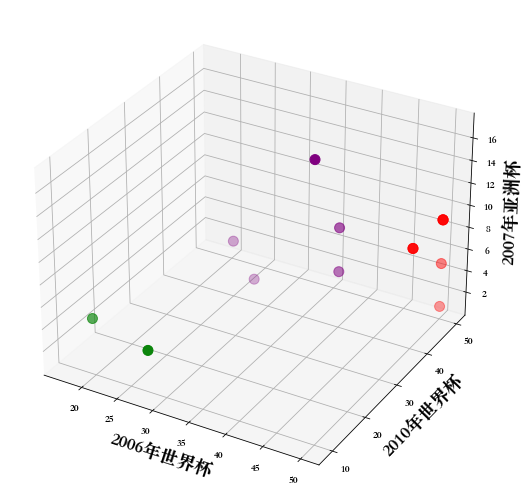

In [12]:
plt.figure(figsize=(12,9))
# 设置字体 显示中文
plt.rcParams['font.family'] = 'Songti SC'

ax = plt.subplot(111,projection = '3d')

colors = ListedColormap(['red','green','purple'])

ax.scatter(X.iloc[:,0],X.iloc[:,1],X['2007亚洲杯'], c = y_,s = 100,cmap = colors)

ax.set_xlabel('2006年世界杯',fontsize = 18)
ax.set_ylabel('2010年世界杯',fontsize = 18)
ax.set_zlabel('2007年亚洲杯',fontsize = 18)

# Kmeans聚类k选择

In [13]:
import numpy as np
from sklearn import datasets

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score # 轮廓系数

import matplotlib.pyplot as plt

## 创建数据

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


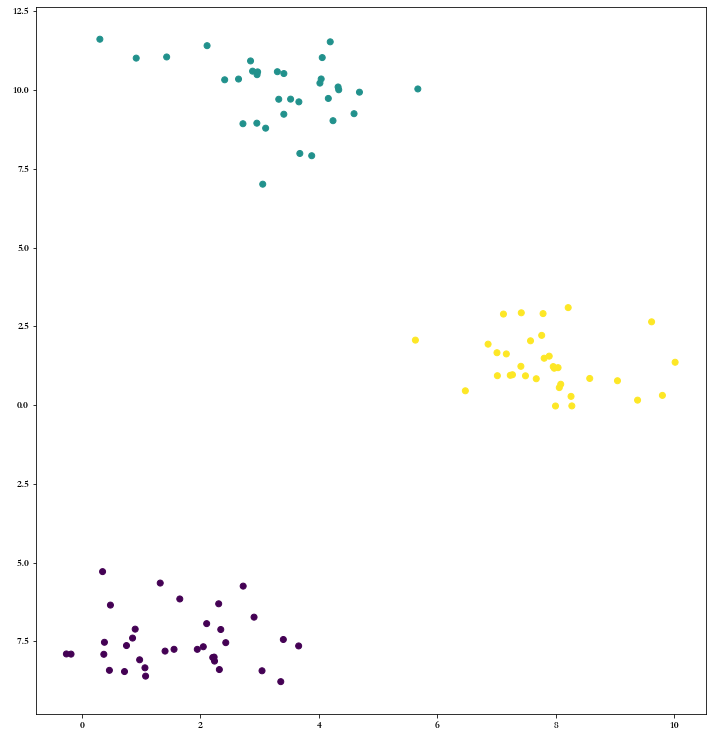

In [15]:
X,y = datasets.make_blobs(centers = 3,random_state = 2048)

plt.figure(figsize=(12,13))
plt.scatter(X[:,0],X[:,1],c = y)

## 使用Kmeans算法，进行类别划分

轮廓系数最大的k值是： 3


Text(0, 0.5, '轮廓系数')

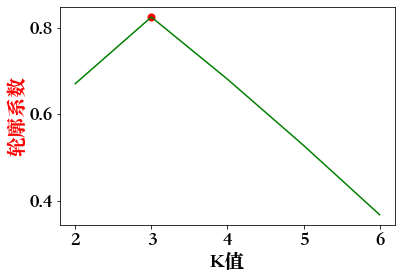

In [16]:
plt.rcParams['font.family'] = 'Songti SC'
plt.rcParams['font.size'] = 20
scores = []
for k in range(2,7):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    y_ = kmeans.predict(X)
    score = silhouette_score(X,y_) # 分数判断时
    scores.append(score)
plt.plot(range(2,7),scores,color = 'green')
index = np.argmax(scores)
plt.scatter(range(2,7)[index],scores[index],color = 'red',s = 50)
print('轮廓系数最大的k值是：',range(2,7)[index])
plt.xlabel('K值')
plt.ylabel('轮廓系数',c = 'red')

## 调整兰德系数

In [17]:
from sklearn.metrics import adjusted_rand_score

Text(0, 0.5, '调整兰德系数')

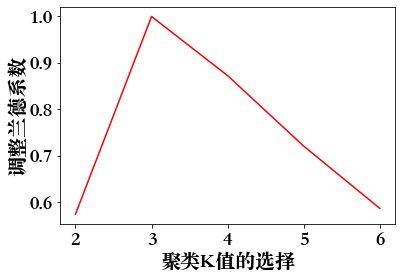

In [18]:
scores = []
for k in range(2,7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_ = kmeans.predict(X)
    
    score = adjusted_rand_score(y,y_)
    scores.append(score)
plt.plot(range(2,7),scores,color = 'red')
plt.xlabel('聚类K值的选择')
plt.ylabel('调整兰德系数')

# Kmeans特征提取图片压缩

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

## 加载数据

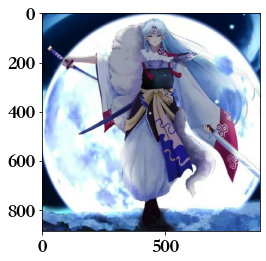

In [69]:
img = plt.imread('./1.jpeg')
plt.imshow(img)

In [70]:
img.shape # 训练数据，要求必须是2维：行表示样本，列表示特征

(886, 886, 3)

In [71]:
X = img.reshape(-1,3)
X.shape # 3像素，16384表示像素点，表示样本，表示一种颜色

(784996, 3)

## 使用Kmeans提取主要颜色

In [80]:
# 提取了10中主要的颜色
kmeans = KMeans(n_clusters = 5) #10表示10种主要颜色
kmeans.fit(X)

KMeans(n_clusters=5)

In [81]:
# 聚类中心，特征（提取的特征）
main_colors = kmeans.cluster_centers_
main_colors

array([[175.22437154, 204.15017133, 236.07644267],
       [ 19.77685368,  24.12730551,  58.91518782],
       [242.91862066, 251.33180539, 251.88859936],
       [ 80.89201286,  95.57387106, 144.83434497],
       [129.42490743, 146.47713039, 183.19121193]])

## 将主要颜色，变成图片

In [82]:
y_ = kmeans.predict(X) # 划归类别
y_

array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

In [83]:
np.unique(y_)

array([0, 1, 2, 3, 4], dtype=int32)

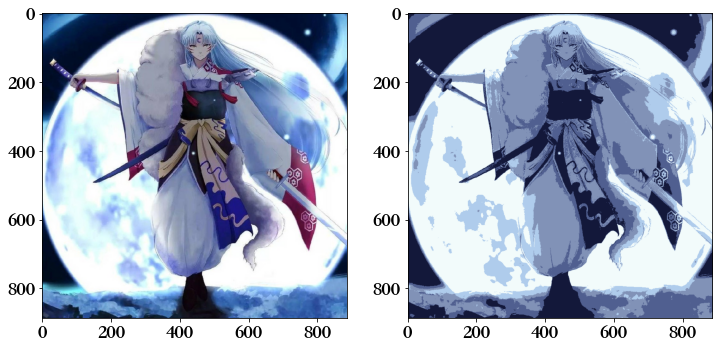

In [84]:
# 花式索引
img2 = main_colors[y_]

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2.reshape(886,886,3).astype('uint8'))

# 作业--汽车购买分类

In [28]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## 数据加载

In [32]:
data = pd.read_csv('./car_data.csv')
X = data
X

,buying,maint,doors,person,lug_boot,safety
0,vhigh,2,2,small,low,unacc
1,vhigh,2,2,small,med,unacc
2,vhigh,2,2,small,high,unacc
3,vhigh,2,2,med,low,unacc
4,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...
1723,low,5more,more,med,med,good
1724,low,5more,more,med,high,vgood
1725,low,5more,more,big,low,unacc
1726,low,5more,more,big,med,good


In [ ]:
# X = data.reset_index(drop = True)
# X

## 数据转换

In [33]:
for col in X.columns:
    print(col,X[col].unique())

buying ['vhigh' 'high' 'med' 'low']
maint ['2' '3' '4' '5more']
doors ['2' '4' 'more']
person ['small' 'med' 'big']
lug_boot ['low' 'med' 'high']
safety ['unacc' 'acc' 'vgood' 'good']


In [34]:
X['buying'] = X['buying'].map({'vhigh':1,'high':2,'med':3,'low':4})
X['maint'] = X['maint'].map({'2':2,'3':3,'4':4,'5more':5})
X['doors'] = X['doors'].map({'2':2,'4':4,'more':5})
X['person'] = X['person'].map({'small':2,'med':5,'big':7})
X['lug_boot'] = X['lug_boot'].map({'low':1,'med':2,'high':3})
X['safety'] = X['safety'].map({'unacc':1,'acc':2,'vgood':3,'good':4})
X

,buying,maint,doors,person,lug_boot,safety
0,1,2,2,2,1,1
1,1,2,2,2,2,1
2,1,2,2,2,3,1
3,1,2,2,5,1,1
4,1,2,2,5,2,1
...,...,...,...,...,...,...
1723,4,5,5,5,2,4
1724,4,5,5,5,3,3
1725,4,5,5,7,1,1
1726,4,5,5,7,2,4


## 聚类建模

In [35]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_= kmeans.predict(X)
silhouette_score(X,y_)

0.28526565681580135

## 筛选最佳聚类条件

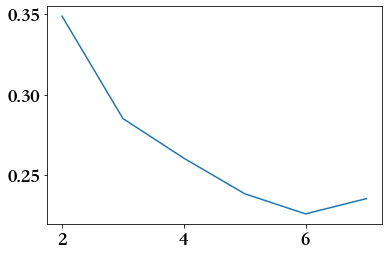

In [36]:
scores = []
for k in range(2,8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_ = kmeans.predict(X)
    score = silhouette_score(X,y_)
    scores.append(score)
plt.plot(range(2,8),scores)

## 最佳的模型

In [37]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_= kmeans.predict(X)
silhouette_score(X,y_)

0.3486833182368877

# DBSCAN聚类算法

## 导入需要的包

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans,DBSCAN
from sklearn import datasets

## 创建数据

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


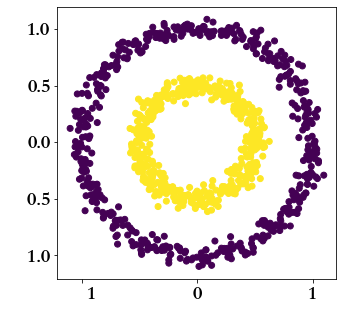

In [42]:
# 创建环形的数据，2类
# y 0,1
X,y = datasets.make_circles(n_samples=1000,noise=0.05,factor=0.5)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c = y)

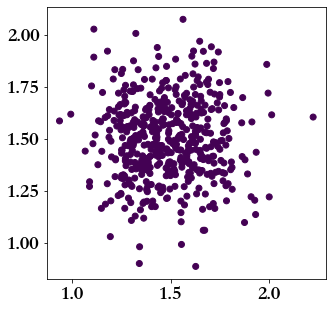

In [43]:
# 生成一类，
# y1 ：0
X1,y1 = datasets.make_blobs(n_samples=500,n_features=2,centers=[(1.5,1.5)],cluster_std=0.2)
plt.figure(figsize=(5,5))
plt.scatter(X1[:,0],X1[:,1],c = y1)

In [44]:
np.unique(y1)

array([0])

In [45]:
np.unique(y)

array([0, 1])

In [46]:
X = np.concatenate([X,X1])

y = np.concatenate([y,y1 + 2])
display(X.shape,y.shape,np.unique(y))

(1500, 2)

(1500,)

array([0, 1, 2])

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


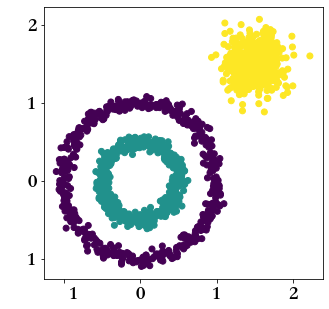

In [47]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c = y)

## Kmeans聚类

In [48]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

In [49]:
from matplotlib.colors import ListedColormap

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


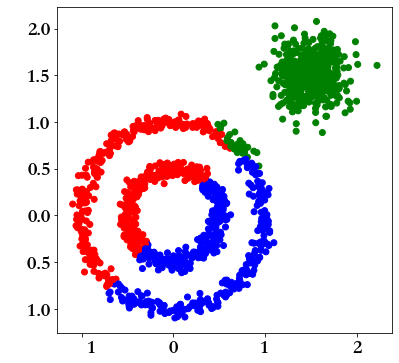

In [50]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

y_ = kmeans.predict(X)
# y_ 类别：0,1,2
# color 颜色
# c = y_ :根据类别绘制颜色，默认
# cmap指定
plt.figure(figsize=(6,6))
cmap = ListedColormap(['red','green','blue'])
plt.scatter(X[:,0],X[:,1],c = y_,cmap = cmap)

## DBSCAN聚类效果

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


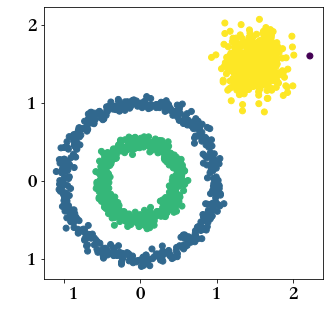

In [51]:
dbscan = DBSCAN(eps = 0.2, min_samples= 6)
dbscan.fit(X)
# 得到每个样本的标签，分类结果
y_ = dbscan.labels_
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c = y_)

In [52]:
np.unique(y_)

array([-1,  0,  1,  2])

In [53]:
cond = y_ != -1

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


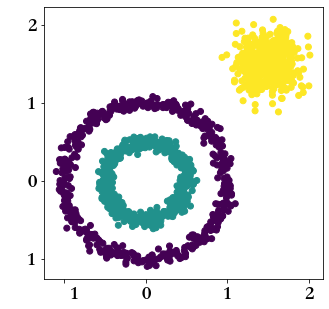

In [54]:
plt.figure(figsize=(5,5))
plt.scatter(X[cond][:,0],X[cond][:,1],c = y_[cond])

In [55]:
from sklearn.metrics import silhouette_score

In [56]:
# DBSCAN可以使用轮廓系数，进行评分
silhouette_score(X,y_)

0.2506935884300873

In [57]:
from sklearn.metrics import adjusted_rand_score

In [58]:
score = adjusted_rand_score(y,y_)

In [59]:
print(score)

0.9990003327778144


# 分层聚类

## 创建数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 自底向上聚类
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll # 瑞士卷

from mpl_toolkits.mplot3d.axes3d import Axes3D 

[ 4.71691079  4.72410878  4.72709363 ... 14.11974189 14.1247525
 14.13363849]


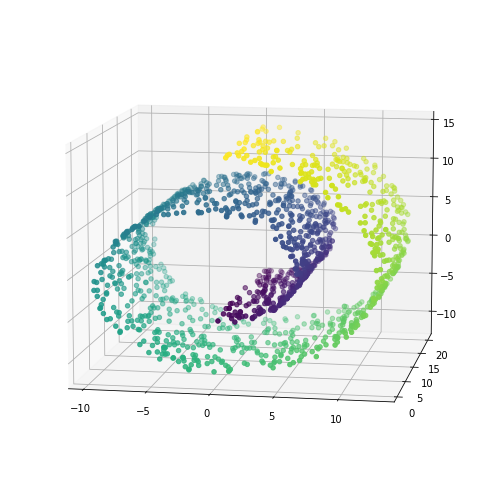

In [2]:
X,y = make_swiss_roll(n_samples=1500,noise = 0.05)
print(np.unique(y))
plt.figure(figsize=(12,9))
a3 = plt.subplot(111,projection = '3d')

a3.scatter(X[:,0],X[:,1],X[:,2],c = y)
a3.view_init(10,-80)

## kmeans进行聚类

In [4]:
from sklearn.cluster import KMeans

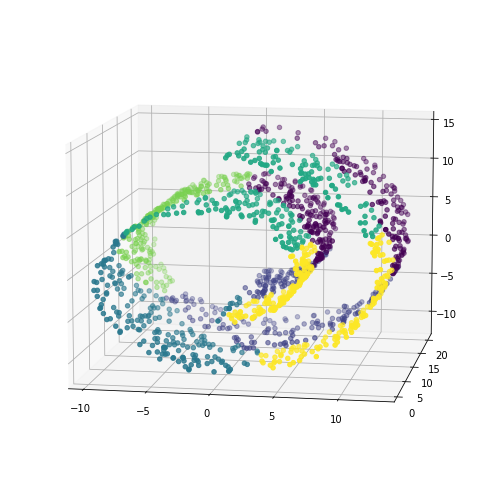

In [5]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_ = kmeans.labels_
fig = plt.figure(figsize=(12,9))
a3 = fig.add_subplot(projection = '3d')
a3.scatter(X[:,0],X[:,1],X[:,2],c = y_)
a3.view_init(10,-80)

## 分层聚类

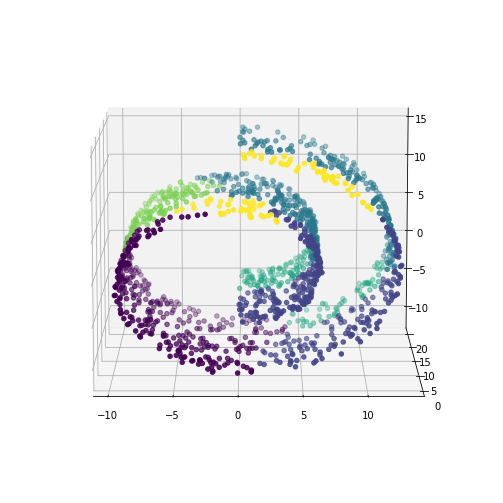

In [9]:
# linkage : {'ward', 'complete', 'average', 'single'}
# ward 表示最小化方差
agg = AgglomerativeClustering(n_clusters = 6,linkage = 'ward')

agg.fit(X)
y_ = agg.labels_

fig = plt.figure(figsize=(12,9))
a3 = fig.add_subplot(projection = '3d')
a3.scatter(X[:,0],X[:,1],X[:,2],c = y_)
a3.view_init(10,-90)

## 分层聚类连接性约束（空间约束）

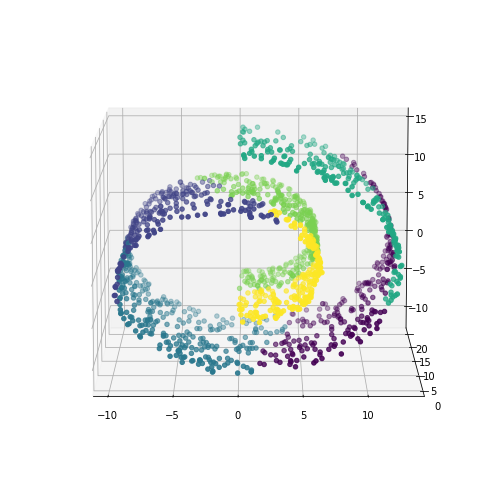

In [10]:
from sklearn.neighbors import kneighbors_graph

conn = kneighbors_graph(X, n_neighbors = 10) # 采用邻居进行空间约束

agg = AgglomerativeClustering(n_clusters = 6, linkage='ward',connectivity = conn)
agg.fit(X)
y_ = agg.labels_

fig = plt.figure(figsize=(12,9))
a3 = fig.add_subplot(projection = '3d')
a3.scatter(X[:,0],X[:,1],X[:,2],c = y_)
a3.view_init(10,-90)